## Chaos, Lyapunov, and entropy increase (Logistic Mapping)

This exercise demonstrates the properties of chaos with Logistic Mapping. One well-known character of chaotic system is the sensitivity on its initial condition.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [4]:
def LogisticMapping(x, mu):
    return 4*mu * x * (1-x)

In [8]:
def select_reg(xmin, xmax, x_data, y_data):
    # Get the indices of the x values within the range we want to fit
    x_data = x_data[xmin:xmax]
    y_data = y_data[xmin:xmax]
    return x_data,y_data


def exponential(x, lam):
    return 10**(-16)*np.exp(lam*x)


def exponential_fit(xmin, xmax, x_data, y_data): # Define the range of x values to fit the Gaussian to
    # Plot the data
    # fig, ax = plt.subplots(figsize=(8,6))
    # ax.scatter(x_data, y_data, label="Data",color='red',s=20)
    x_data,y_data = select_reg(xmin, xmax, x_data, y_data)
    # Use the curve_fit function to fit the Gaussian to the selected data
    y_max = max(y_data)
    popt, pcov = curve_fit(exponential, x_data, y_data)
    # c, N, center, stddev
    ## Print the results
    print('lambda:' ,popt[0],'with uncertainty =',(pcov[0][0])**(1/2))




Starting with $\mu = 0.9$, we would like to know how the separation between two initially close trajectories increase over time.

In [6]:
mu = 0.9
x = 0.99
y = abs(x - 10**(-16)) 
sep = []
for i in range(200):
    sep.append(abs(y - x))
    x = LogisticMapping(x, mu)
    y = LogisticMapping(y, mu)

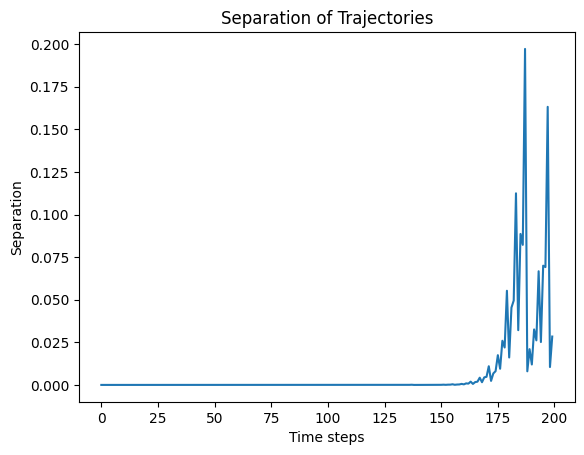

In [12]:
fig, ax = plt.subplots()
ax.plot(sep)
ax.set_ylabel("Separation")
ax.set_xlabel("Time steps")
ax.set_title("Separation of Trajectories")
plt.savefig("separation")

The separation grows rapidly at a sufficient long time, about 175 steps. After that the two trajectories decorrelate from each other and the separation becomes randomly fluctuating.

In [9]:
stop_index = sep.index(max(sep))
exponential_fit(0, stop_index, np.arange(0, len(sep)), sep)

lambda: 0.18565895737774757 with uncertainty = 0.000173535665520843


Lyapunov exponent is defined as the exponential deviation from the initial trajectory as time grows.

$$ |\delta Z(t)| \approx e^{\lambda t} | \delta Z_{0} |  $$


which we have calculated the Lyapunov exponent $\lambda = 0.2$